Human Frequency Range: 19.848 - 20677.074311075532
Bird Frequency Range: 60.00000000000001 - 6184.555320336759


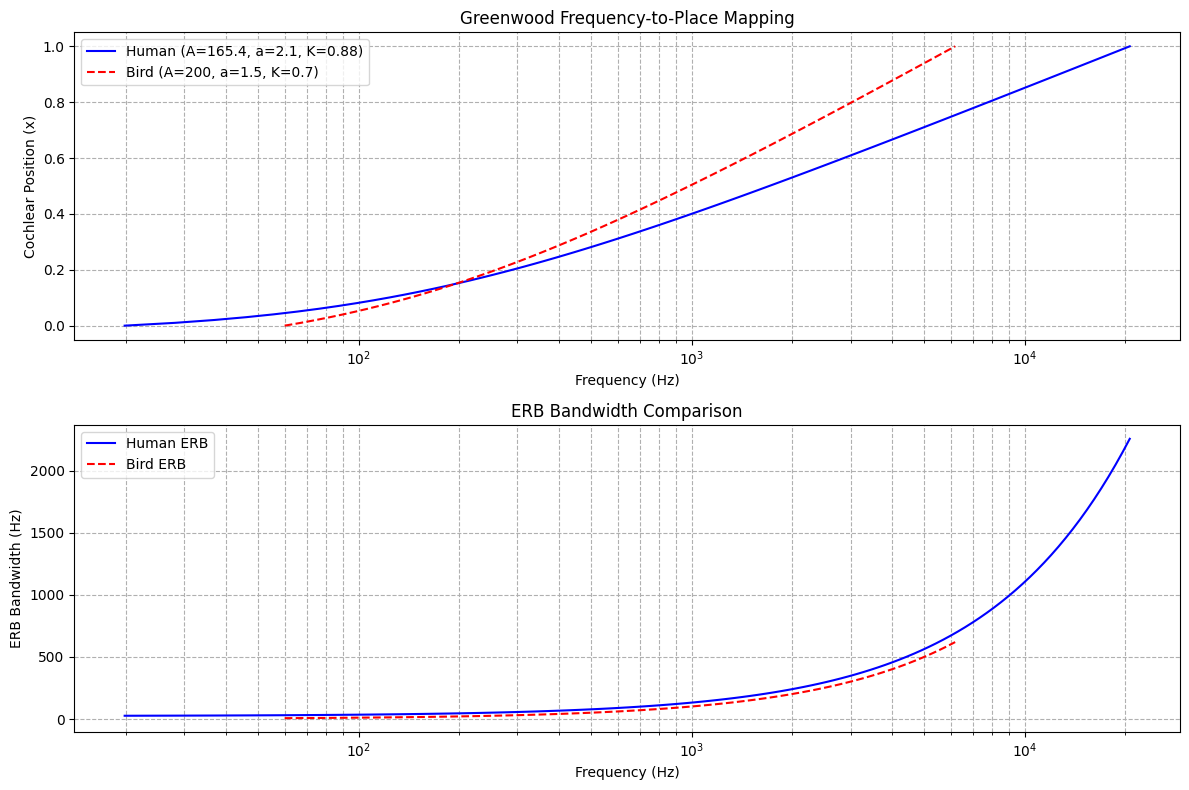

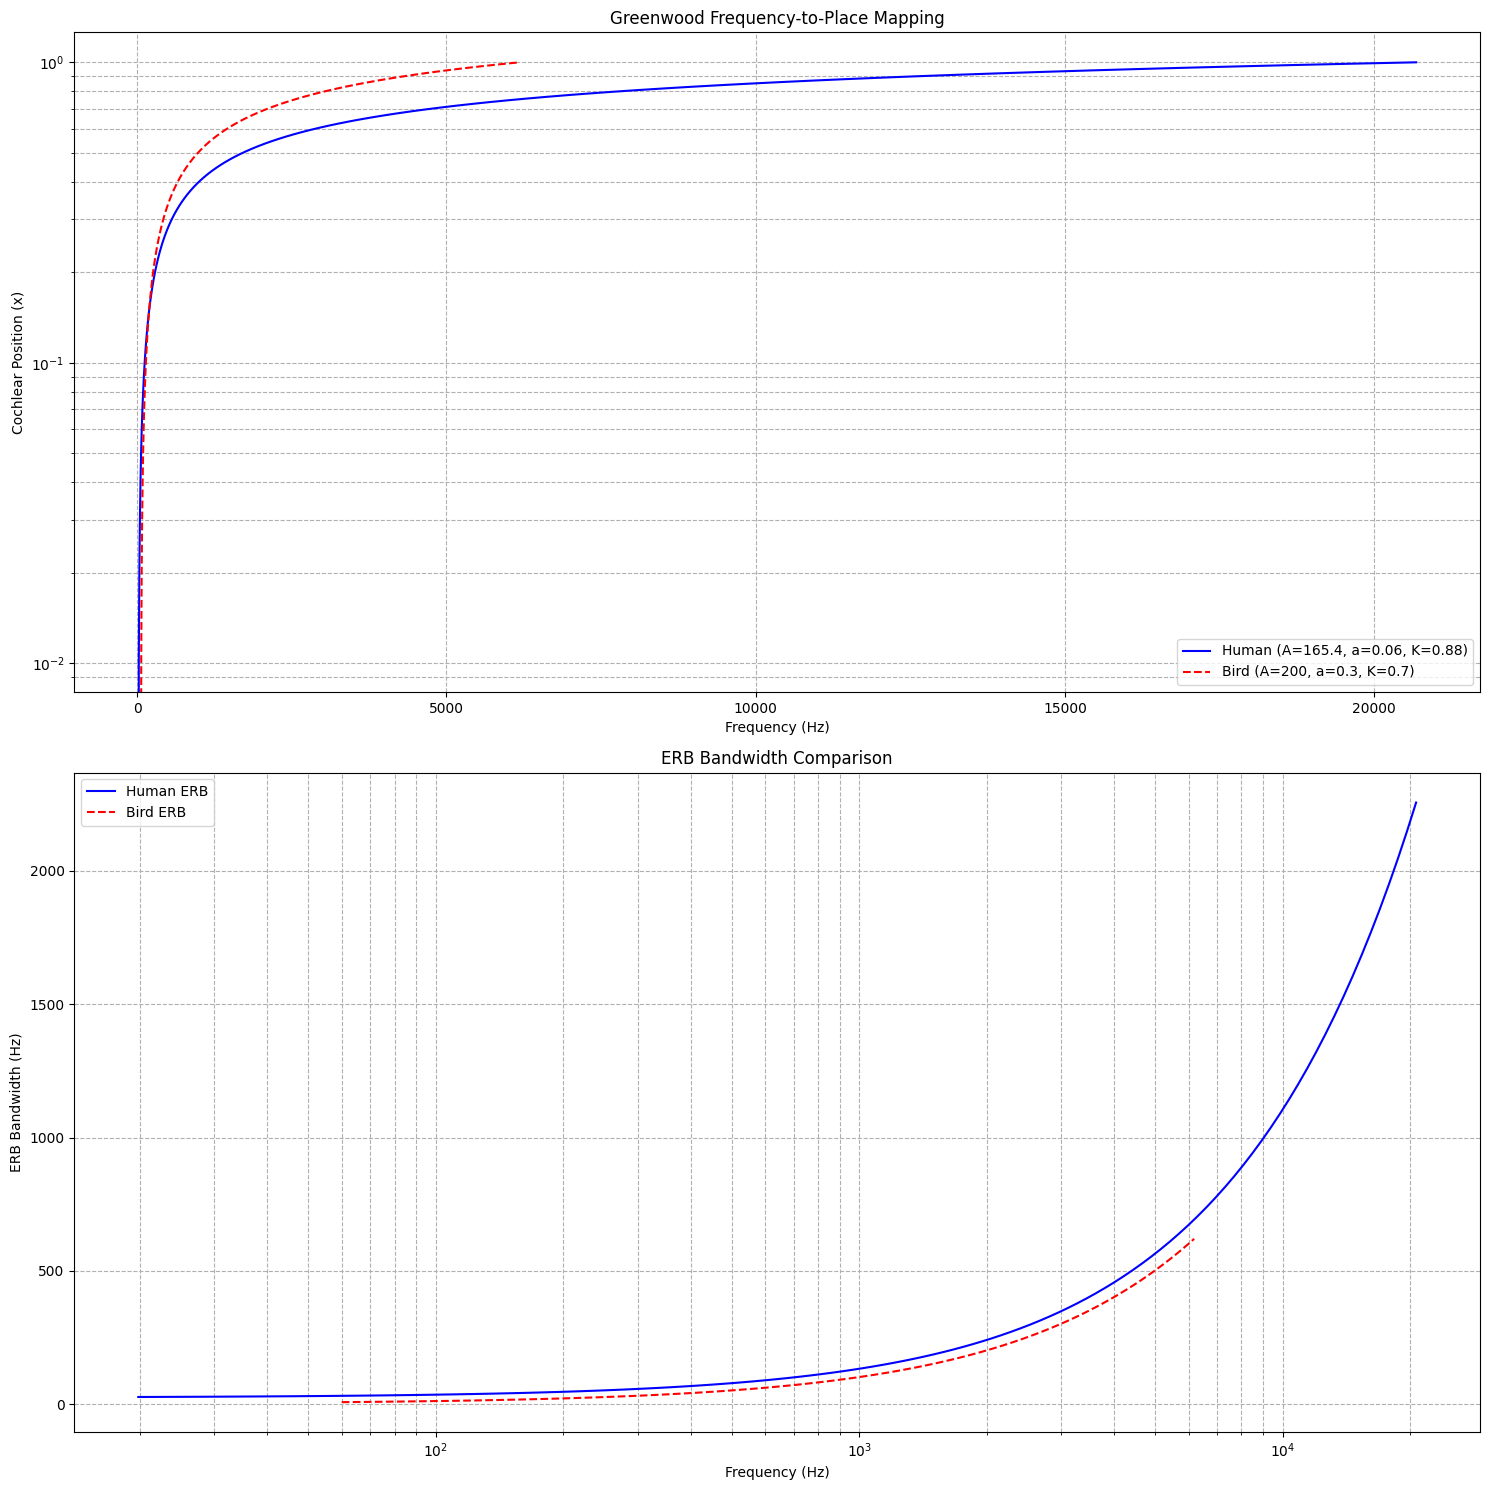

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Greenwood function
def greenwood(x, A, a, K):
    return A * (10**(a * x) - K)

# Human parameters (Greenwood 1990)
A_human, a_human, K_human = 165.4, 0.06, 0.88

# Avian parameters (approximated for songbirds)
A_bird, a_bird, K_bird = 200.0, 0.3, 0.7

# ERB functions
def erb_human(f):
    return 24.7 * (4.37 * f / 1000 + 1)  # Glasberg & Moore (1990)
import numpy as np
import matplotlib.pyplot as plt

# Greenwood function
def greenwood(x, A, a, K):
    return A * (10**(a * x) - K)

# Human parameters (Greenwood 1990)
A_human, a_human, K_human = 165.4, 2.1, 0.88  # Adjusted 'a' for better scaling

# Avian parameters (approximation for songbirds)
A_bird, a_bird, K_bird = 200.0, 1.5, 0.7  # Adjusted 'a' for reasonable frequency scaling

# ERB functions
def erb_human(f):
    return 24.7 * (4.37 * f / 1000 + 1)  # Glasberg & Moore (1990)

def erb_bird(f):
    return 0.1 * f + 1.5  # Approximate avian ERB (Dooling & Saunders 1975)

# Generate cochlear positions (0 = apex, 1 = base)
x = np.linspace(0, 1, 100)

# Compute frequencies and ERBs
f_human = greenwood(x, A_human, a_human, K_human)
f_bird = greenwood(x, A_bird, a_bird, K_bird)

erb_h = erb_human(f_human)
erb_b = erb_bird(f_bird)

# Debugging Prints
print(f"Human Frequency Range: {f_human.min()} - {f_human.max()}")
print(f"Bird Frequency Range: {f_bird.min()} - {f_bird.max()}")

# Plotting
plt.figure(figsize=(12, 8))

# Frequency-to-place mapping
plt.subplot(2, 1, 1)
plt.plot(f_human, x, label='Human (A=165.4, a=2.1, K=0.88)', color='blue')
plt.plot(f_bird, x, label='Bird (A=200, a=1.5, K=0.7)', color='red', linestyle='--')
plt.ylabel('Cochlear Position (x)')
plt.xlabel('Frequency (Hz)')
plt.title('Greenwood Frequency-to-Place Mapping')
plt.xscale('log')  # Logarithmic frequency scale
plt.grid(True, which="both", ls="--")
plt.legend()

# ERB Bandwidths
plt.subplot(2, 1, 2)
plt.plot(f_human, erb_h, label='Human ERB', color='blue')
plt.plot(f_bird, erb_b, label='Bird ERB', color='red', linestyle='--')
plt.xlabel('Frequency (Hz)')
plt.ylabel('ERB Bandwidth (Hz)')
plt.title('ERB Bandwidth Comparison')
plt.xscale('log')  # Logarithmic frequency scale
plt.grid(True, which="both", ls="--")
plt.legend()

plt.tight_layout()
plt.show()

def erb_bird(f):
    return 0.1 * f + 1.5  # Approximate avian ERB (Dooling & Saunders 1975)

# Generate cochlear positions (0=apex, 1=base)
x = np.linspace(0, 1, 100)

# Compute frequencies and ERBs
f_human = greenwood(x, A_human, a_human, K_human)
f_bird = greenwood(x, A_bird, a_bird, K_bird)

erb_h = erb_human(f_human)
erb_b = erb_bird(f_bird)

# Plotting
plt.figure(figsize=(15, 15))  # Increased height from 12 to 15
# Frequency-to-place mapping
plt.subplot(2, 1, 1)
plt.plot(f_human, x, label='Human (A=165.4, a=0.06, K=0.88)', color='blue')
plt.plot(f_bird, x, label='Bird (A=200, a=0.3, K=0.7)', color='red', linestyle='--')
plt.ylabel('Cochlear Position (x)')
plt.xlabel('Frequency (Hz)')
plt.title('Greenwood Frequency-to-Place Mapping')
plt.yscale('log')
plt.grid(True, which="both", ls="--")
plt.legend()

# ERB Bandwidths
plt.subplot(2, 1, 2)
plt.plot(f_human, erb_h, label='Human ERB', color='blue')
plt.plot(f_bird, erb_b, label='Bird ERB', color='red', linestyle='--')
plt.xlabel('Frequency (Hz)')
plt.ylabel('ERB Bandwidth (Hz)')
plt.title('ERB Bandwidth Comparison')
plt.xscale('log')
plt.grid(True, which="both", ls="--")
plt.legend()

plt.tight_layout()
plt.show()

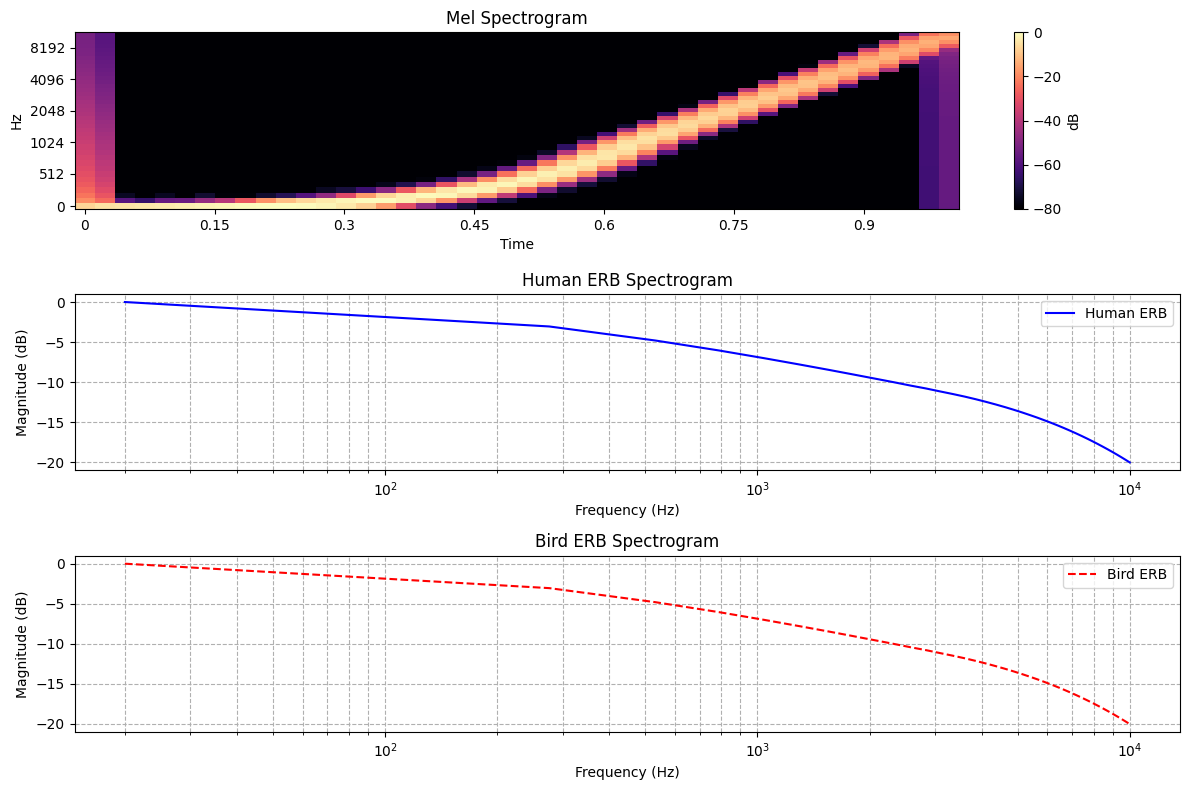

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy.signal import chirp

# ERB Functions
def erb_human(f):
    return 24.7 * (4.37 * f / 1000 + 1)  # Glasberg & Moore (1990)

def erb_bird(f):
    # return 0.1 * f + 1.5  # Approximate avian ERB (Dooling & Saunders 1975)
    return 21.1 * (1.37 * f / 1000 + 1)  # Glasberg & Moore (1990)

# Generate a chirp signal (1-second, sweeping from 20Hz to 10kHz)
sr = 22050  # Sample rate
t = np.linspace(0, 1, sr)
signal = chirp(t, f0=20, f1=10000, t1=1, method='logarithmic')

# Compute Mel spectrogram
mel_spec = librosa.feature.melspectrogram(y=signal, sr=sr, n_mels=40)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

# Compute ERB Spectrograms (using human & bird ERBs)
frequencies = np.linspace(20, 10000, 40)  # 40 frequency bands
erb_h_values = erb_human(frequencies)
erb_b_values = erb_bird(frequencies)

# Convert ERB bands into "filterbank" for spectrograms (approximation)
human_erb_spec = np.interp(frequencies, np.linspace(0, sr//2, mel_spec.shape[0]), mel_spec.mean(axis=1))
bird_erb_spec = np.interp(frequencies, np.linspace(0, sr//2, mel_spec.shape[0]), mel_spec.mean(axis=1))

# Convert to decibel scale
human_erb_spec_db = librosa.power_to_db(human_erb_spec, ref=np.max)
bird_erb_spec_db = librosa.power_to_db(bird_erb_spec, ref=np.max)

# Plot results
plt.figure(figsize=(12, 8))

# Mel Spectrogram
plt.subplot(3, 1, 1)
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(label='dB')
plt.title('Mel Spectrogram')

# Human ERB Spectrogram
plt.subplot(3, 1, 2)
plt.plot(frequencies, human_erb_spec_db, color='blue', label='Human ERB')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.xscale('log')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.title('Human ERB Spectrogram')

# Bird ERB Spectrogram
plt.subplot(3, 1, 3)
plt.plot(frequencies, bird_erb_spec_db, color='red', linestyle='--', label='Bird ERB')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.xscale('log')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.title('Bird ERB Spectrogram')

plt.tight_layout()
plt.show()


Human ERB ERB values (first 5): [24.7        29.34854482 33.99708965 38.64563447 43.2941793 ]
Human ERB Greenwood Place Mapping (first 5): [  0.         115.35754331 137.24238935 150.00645044 159.024973  ]
Bird ERB ERB values (first 5): [ 1.5         5.80664062 10.11328125 14.41992188 18.7265625 ]
Bird ERB Greenwood Place Mapping (first 5): [ 0.         53.51131903 60.77340052 64.89491753 67.76399752]
Human ERB ERB values (first 5): [24.7        29.34854482 33.99708965 38.64563447 43.2941793 ]
Bird ERB ERB values (first 5): [ 1.5         5.80664062 10.11328125 14.41992188 18.7265625 ]


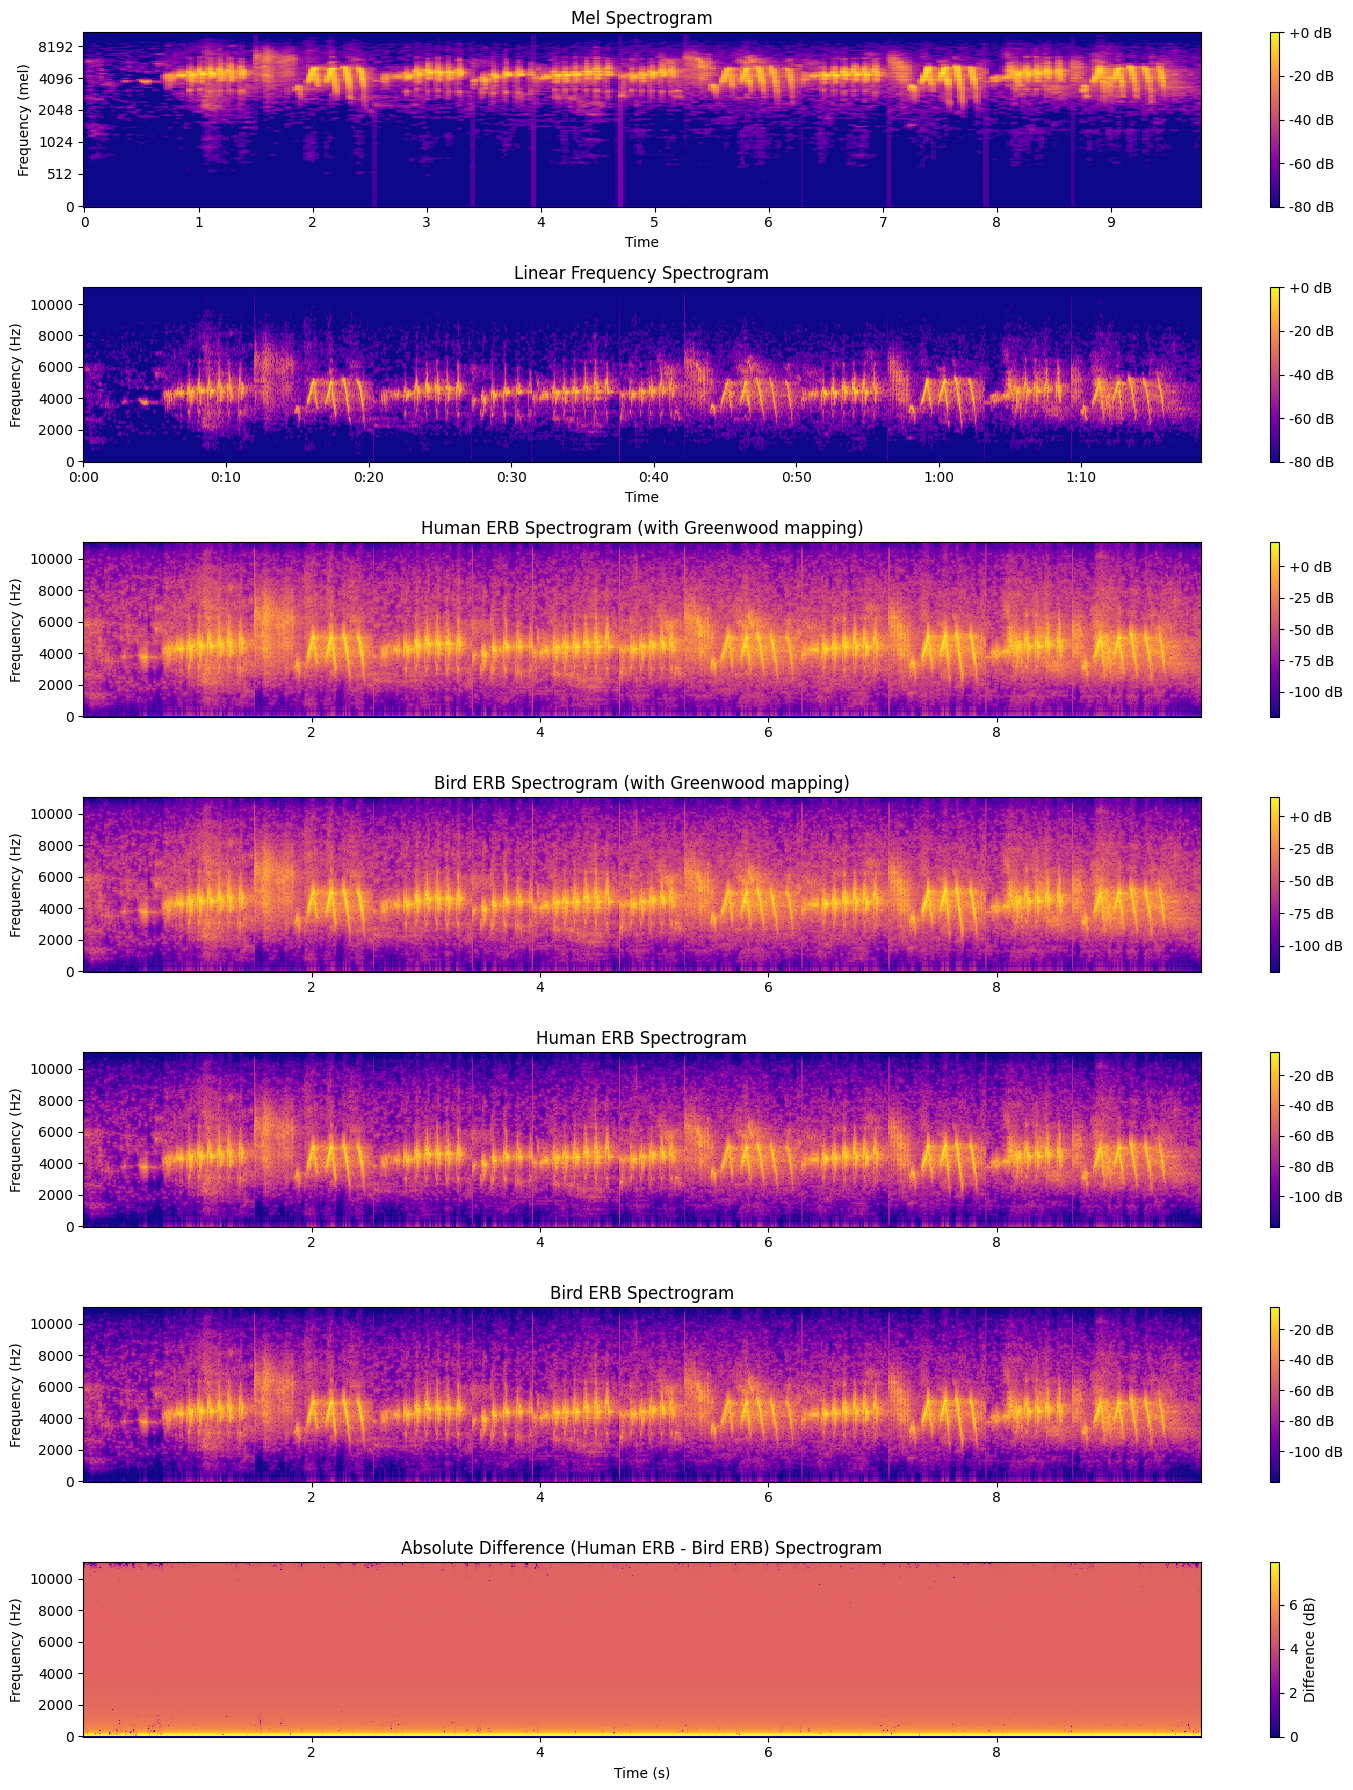

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy.signal import chirp, spectrogram, sawtooth
from scipy import interpolate

# ERB Functions
def erb_human(f):
    """
    Equivalent Rectangular Bandwidth for human hearing
    Based on Glasberg & Moore (1990)
    """
    return 24.7 * (4.37 * f / 1000 + 1)

def erb_bird(f):
    """
    Approximate Equivalent Rectangular Bandwidth for bird hearing
    Based on Dooling & Saunders (1975)
    """
    return 0.1 * f + 1.5

def greenwood_mapping(f, A=165.4, a=2.1, K=0.88):
    """
    Greenwood frequency-to-place mapping for humans
    
    Parameters:
    -----------
    f : float or numpy.ndarray
        Frequency in Hz
    A, a, K : float
        Greenwood map parameters
    
    Returns:
    --------
    Normalized cochlear place
    """
    return (A * np.log10(f/a + 1)) ** K

def greenwood_mapping_bird(f, A=200, a=1.5, K=0.7):
    """
    Greenwood frequency-to-place mapping for birds
    
    Parameters are slightly different from human mapping
    """
    return (A * np.log10(f/a + 1)) ** K

def compute_erb_spectrogram(signal, sr, erb_function, mapping_function=None, name="ERB"):
    """
    Compute spectrogram using ERB-based filterbank and optional Greenwood mapping
    
    Parameters:
    -----------
    signal : numpy.ndarray
        Input audio signal
    sr : int
        Sampling rate
    erb_function : callable
        ERB computation function (human or bird)
    mapping_function : callable, optional
        Greenwood mapping function (default None)
    name : str
        Name for print identification
    
    Returns:
    --------
    numpy.ndarray
        ERB-weighted spectrogram with optional Greenwood mapping
    """
    # Compute spectrogram
    f, t, Sxx = spectrogram(signal, fs=sr, nfft=512)
    
    # Compute ERB values for frequencies
    erb_values = erb_function(f)
    
    # Print some diagnostic information
    print(f"{name} ERB values (first 5): {erb_values[:5]}")
    
    if mapping_function is not None:
        # Compute Greenwood mapping for frequencies
        place_mapping = mapping_function(f)
        print(f"{name} Greenwood Place Mapping (first 5): {place_mapping[:5]}")
        # Weight spectrogram by ERB values and place mapping
        erb_weighted_spec = Sxx * erb_values[:, np.newaxis] * place_mapping[:, np.newaxis]
    else:
        # Weight spectrogram by ERB values only
        erb_weighted_spec = Sxx * erb_values[:, np.newaxis]
    
    return f, t, erb_weighted_spec

def generate_test_signals(sr=44100, duration=3.0):
    """
    Generate a complex test signal with multiple components:
    - Frequency-modulated bird-like calls
    - Harmonic structures (bird song harmonics)
    - Background noise (forest-like)
    - Sudden transient (wing flap)
    - Constant tone (background insect)
    
    Parameters:
    -----------
    sr : int, optional
        Sampling rate (default 44100)
    duration : float, optional
        Duration in seconds (default 3.0)
    
    Returns:
    --------
    tuple
        (complex_signal, sr)
    """
    t = np.linspace(0, duration, int(sr * duration))
    
    # 1. Frequency-modulated bird call (two different types)
    bird1 = 0.5 * chirp(t, f0=2000, f1=6000, t1=duration, method='logarithmic')
    bird1 *= np.hanning(len(t))  # Add envelope
    
    # Second bird with discontinuous calls
    bird2_times = [(0.5, 1.0), (1.8, 2.3)]
    bird2 = np.zeros_like(t)
    for start, end in bird2_times:
        idx = (t >= start) & (t <= end)
        local_t = t[idx] - start
        bird2[idx] = 0.7 * chirp(local_t, f0=4000, f1=8000, t1=end-start, method='linear')
        bird2[idx] *= np.hanning(len(local_t))  # Add envelope
    
    # 2. Harmonic structures (bird song harmonics)
    harmonics = 0.3 * sawtooth(2 * np.pi * 1500 * t, width=0.5)
    harmonics += 0.2 * sawtooth(2 * np.pi * 3000 * t, width=0.5)
    harmonics *= (t > 1.2) & (t < 2.5)  # Only active during middle section
    
    # 3. Background noise (forest-like)
    noise = 0.1 * np.random.normal(0, 1, len(t))
    # Add low-frequency rumble
    noise += 0.05 * np.sin(2 * np.pi * 80 * t)
    
    # 4. Sudden transient (wing flap at 0.8s)
    transient = np.zeros_like(t)
    transient_time = 0.8
    transient_idx = np.argmin(np.abs(t - transient_time))
    transient[transient_idx:transient_idx+100] = 0.5 * np.random.normal(0, 1, 100)
    
    # 5. Constant high-frequency tone (background insect)
    insect = 0.15 * np.sin(2 * np.pi * 12000 * t)
    
    # Combine all components
    complex_signal = bird1 + bird2 + harmonics + noise + transient + insect
    
    # Normalize to prevent clipping
    complex_signal /= np.max(np.abs(complex_signal))
    
    return complex_signal, sr

def plot_erb_spectrograms():
    """
    Visualize different spectrogram representations with FIXED difference calculation
    """
    # Generate test signals
    # signal, sr = librosa.load(librosa.ex('trumpet'), sr=None)
    signal, sr = librosa.load("processed_bird_calls.wav")
    
    # Create figure with adjusted size for 5 subplots
    plt.figure(figsize=(15, 18))  # Increased height to accommodate 5 rows
    
    # 1. Mel Spectrogram
    plt.subplot(7, 1, 1)
    mel_spec = librosa.feature.melspectrogram(y=signal, sr=sr, n_mels=256)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel', cmap="plasma")
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.ylabel('Frequency (mel)')
    
    # 2. Linear Spectrogram
    plt.subplot(7, 1, 2)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(signal, n_fft=256)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear', cmap="plasma")
    plt.colorbar(format='%+2.0f dB')
    plt.title('Linear Frequency Spectrogram')
    plt.ylabel('Frequency (Hz)')
    
    # 3. Human ERB Spectrogram
    plt.subplot(7, 1, 3)
    f_human, t_human, erb_human_spec = compute_erb_spectrogram(signal, sr, erb_human, greenwood_mapping, "Human ERB")
    erb_human_spec_db_g = 10 * np.log10(erb_human_spec + 1e-12)
    plt.pcolormesh(t_human, f_human, erb_human_spec_db_g, shading='auto', cmap='plasma')
    plt.colorbar(format='%+2.0f dB')
    plt.ylabel('Frequency (Hz)')
    plt.title('Human ERB Spectrogram (with Greenwood mapping)')
    
    # 4. Bird ERB Spectrogram
    plt.subplot(7, 1, 4)
    f_bird, t_bird, erb_bird_spec = compute_erb_spectrogram(signal, sr, erb_bird, greenwood_mapping_bird, "Bird ERB")
    erb_bird_spec_db_g = 10 * np.log10(erb_bird_spec + 1e-12)
    plt.pcolormesh(t_bird, f_bird, erb_bird_spec_db_g, shading='auto', cmap='plasma')
    plt.colorbar(format='%+2.0f dB')
    plt.ylabel('Frequency (Hz)')
    plt.title('Bird ERB Spectrogram (with Greenwood mapping)')

    # 3. Human ERB Spectrogram
    plt.subplot(7, 1, 5)
    f_human, t_human, erb_human_spec = compute_erb_spectrogram(signal, sr, erb_human, None, "Human ERB")
    erb_human_spec_db = 10 * np.log10(erb_human_spec + 1e-12)
    plt.pcolormesh(t_human, f_human, erb_human_spec_db, shading='auto', cmap='plasma')
    plt.colorbar(format='%+2.0f dB')
    plt.ylabel('Frequency (Hz)')
    plt.title('Human ERB Spectrogram')
    
    # 4. Bird ERB Spectrogram
    plt.subplot(7, 1, 6)
    f_bird, t_bird, erb_bird_spec = compute_erb_spectrogram(signal, sr, erb_bird, None, "Bird ERB")
    erb_bird_spec_db = 10 * np.log10(erb_bird_spec + 1e-12)
    plt.pcolormesh(t_bird, f_bird, erb_bird_spec_db, shading='auto', cmap='plasma')
    plt.colorbar(format='%+2.0f dB')
    plt.ylabel('Frequency (Hz)')
    plt.title('Bird ERB Spectrogram')
    
    # 5. ABSOLUTE DIFFERENCE
    plt.subplot(7, 1, 7)
    
    # Create interpolation functions using RegularGridInterpolator
    from scipy.interpolate import RegularGridInterpolator
    
    # Human spectrogram interpolation
    interp_human = RegularGridInterpolator(
        (t_human, f_human), 
        erb_human_spec_db_g.T,  # Note the transpose
        bounds_error=False,
        fill_value=None
    )
    
    # Bird spectrogram interpolation
    interp_bird = RegularGridInterpolator(
        (t_bird, f_bird), 
        erb_bird_spec_db_g.T,  # Note the transpose
        bounds_error=False,
        fill_value=None
    )
    
    # Create common grid
    t_min = max(t_human.min(), t_bird.min())
    t_max = min(t_human.max(), t_bird.max())
    f_min = max(f_human.min(), f_bird.min())
    f_max = min(f_human.max(), f_bird.max())
    
    t_interp = np.linspace(t_min, t_max, min(len(t_human), len(t_bird)))
    f_interp = np.linspace(f_min, f_max, min(len(f_human), len(f_bird)))
    
    # Create meshgrid for evaluation
    tt, ff = np.meshgrid(t_interp, f_interp, indexing='ij')
    points = np.column_stack((tt.ravel(), ff.ravel()))
    
    # Interpolate both spectrograms
    human_interp = interp_human(points).reshape(tt.shape)
    bird_interp = interp_bird(points).reshape(tt.shape)
    
    # Calculate absolute difference
    difference = np.abs(human_interp - bird_interp)
    
    # Plot with optimized color range
    vmax = np.percentile(difference, 99)
    plt.pcolormesh(t_interp, f_interp, difference.T, shading='auto', cmap='plasma', vmin=0, vmax=vmax)
    plt.colorbar(label='Difference (dB)')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('Absolute Difference (Human ERB - Bird ERB) Spectrogram')
    
    plt.tight_layout()
    plt.show()

# Run the visualization
if __name__ == "__main__":
    plot_erb_spectrograms()

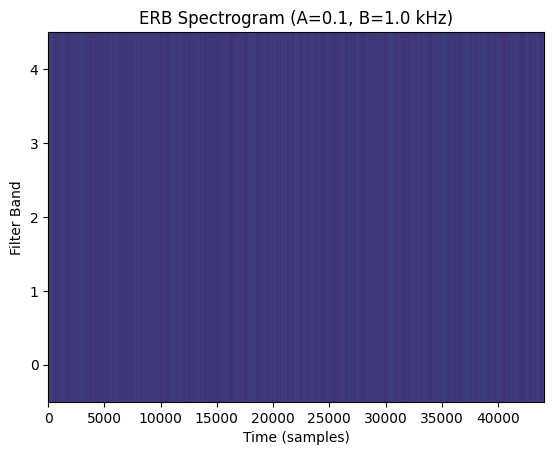

array([[-0.95119079,  1.71631322,  1.2081554 , ...,  0.53059614,
        -0.06213465, -0.30550907],
       [-0.9512135 ,  1.71637696,  1.20814317, ...,  0.53063828,
        -0.06214883, -0.30551488],
       [-0.9512142 ,  1.71637894,  1.20814279, ...,  0.53063959,
        -0.06214927, -0.30551506],
       ...,
       [-0.95121422,  1.71637899,  1.20814278, ...,  0.53063963,
        -0.06214928, -0.30551506],
       [-0.95121422,  1.71637899,  1.20814278, ...,  0.53063963,
        -0.06214928, -0.30551506],
       [-0.95121422,  1.71637899,  1.20814278, ...,  0.53063963,
        -0.06214928, -0.30551506]])

In [ ]:
import numpy as np
from gammatone.filters import make_erb_filters, erb_filterbank
import matplotlib.pyplot as plt
import librosa 

def bird_erb_spectrogram(signal, fs, A=0.1, B=1.0):
    """
    Compute ERB spectrogram using adjustable A and B coefficients.
    Args:
        signal: Input audio (1D array).
        fs: Sampling rate (Hz).
        A: Slope of ERB (typical 0.05–0.15 for birds).
        B: Intercept (kHz) (typical 0.1–2.0 for birds).
    """
    # Convert B from kHz to Hz
    B_Hz = B * 1000
    
    # Center frequencies (bird hearing range: ~500 Hz to 10 kHz)
    center_freqs = np.linspace(500, 10000, 50)
    
    # Compute ERB bandwidths for each center frequency
    erb_widths = A * center_freqs + B_Hz  # Array of ERB bandwidths (Hz)
    
    # Generate filterbank (use erb_widths directly)
    filters = make_erb_filters(fs, center_freqs, width=erb_widths)
    filtered_signal = erb_filterbank(signal, filters)
    
    plt.figsize=(12, 8)
    # Plot spectrogram (example for first 5 filters)
    plt.imshow(np.abs(filtered_signal[:5]), aspect='auto', origin='lower')
    plt.xlabel('Time (samples)')
    plt.ylabel('Filter Band')
    plt.title(f'ERB Spectrogram (A={A}, B={B} kHz)')
    plt.show()
    
    return filtered_signal

# Example usage
fs = 44100  # Sampling rate (adjust to your audio)
signal = np.random.randn(fs * 1)  # 1 sec of white noise (replace with your audio)
bird_erb_spectrogram(signal, fs, A=0.1, B=1.0)

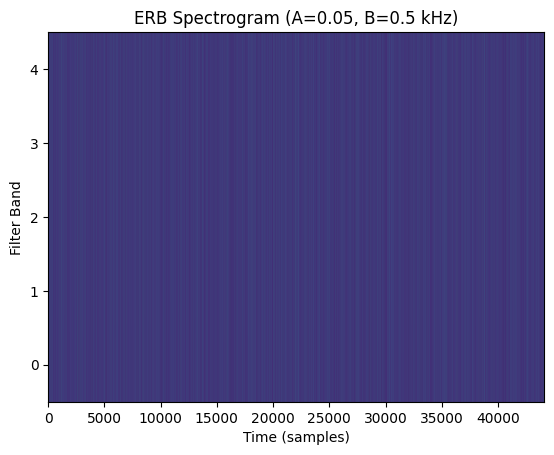

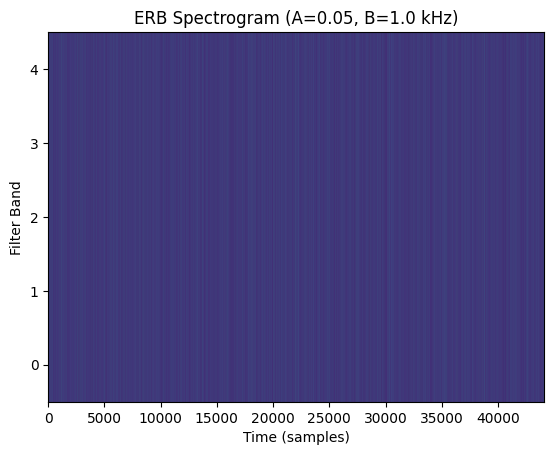

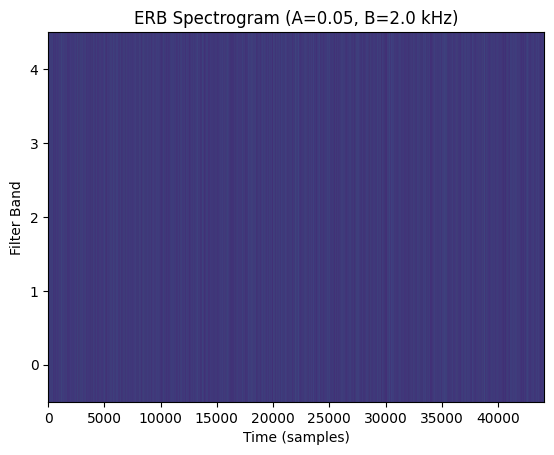

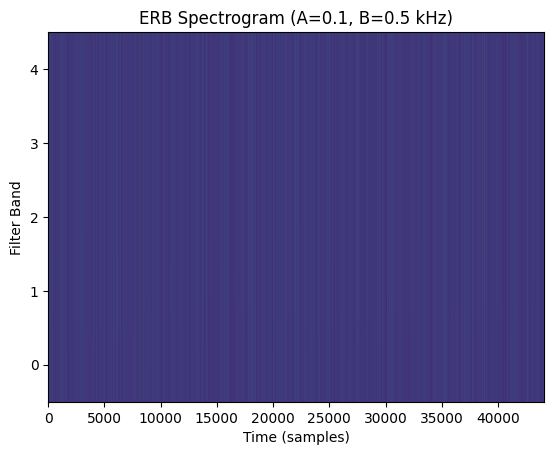

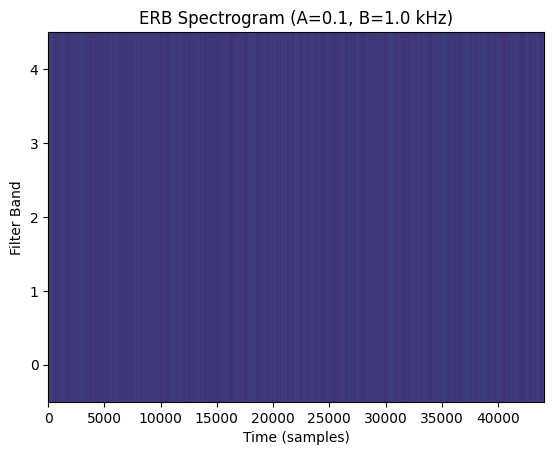

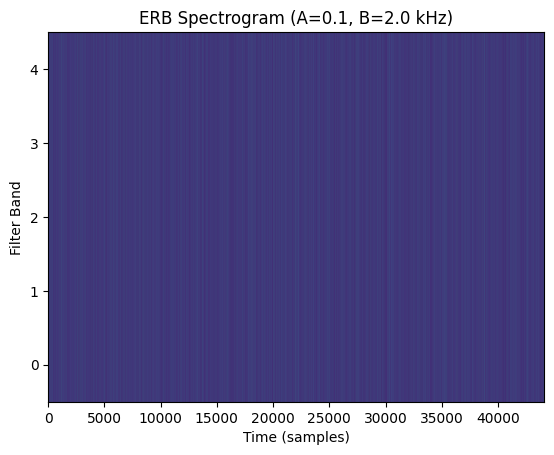

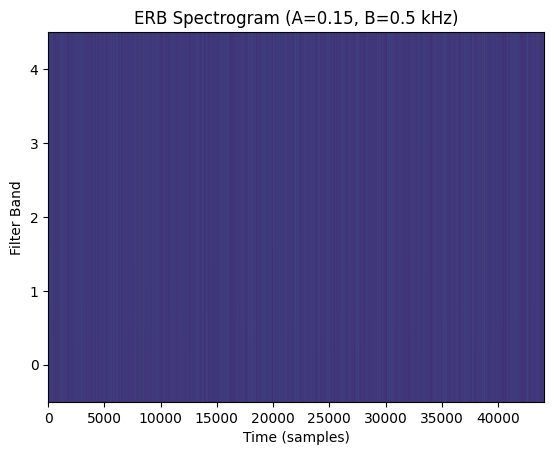

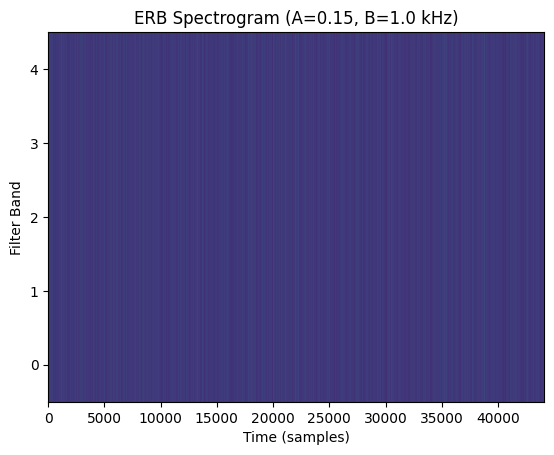

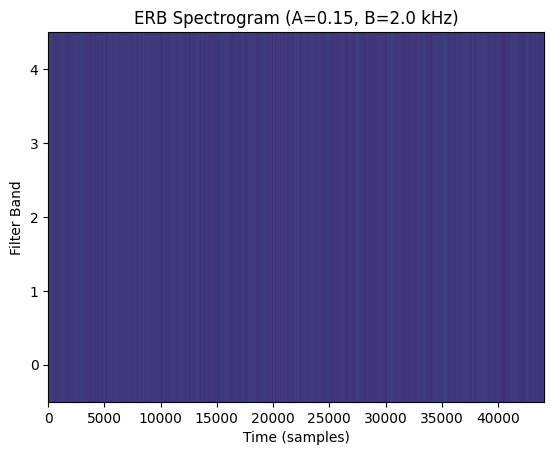

In [50]:
for A in [0.05, 0.1, 0.15]:
    for B in [0.5, 1.0, 2.0]:
        bird_erb_spectrogram(signal, fs, A=A, B=B)